In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Домашнее задание 1
Необходимо найти оптимальную прямую линию для данных
1. Найдите параметры тета 0 и тета 1
2. Визуализируйте прямую линию
3. Посчитайте среднюю квадратичную ошибку и визуализируйте


In [3]:
data = np.loadtxt("data1.csv",delimiter=",").T.tolist()
X=np.array(data[0])
Y=np.array(data[1])
print(len(X),len(Y))

1067 1067


In [4]:
#Допишите функцию gradientDescent и используйте для решения задачи

def gradientDescent(x, y, learning_rate):
    theta1 = theta0 = 0
    iterations = 200
    n = len(x)

    J = []

    for i in range(iterations):
        y_predicted = theta1 * x + theta0
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        theta1_d = -(2/n)*sum(x*(y-y_predicted))
        theta0_d = -(2/n)*sum(y-y_predicted)
        theta1 = theta1 - learning_rate * theta1_d
        theta0 = theta0 - learning_rate * theta0_d

        J.append(cost)

    return theta0, theta1, cost, J

In [5]:
#Определим альфа

min_value=1500

for learning_rate in np.linspace(0.001,0.1,100):
    gradientDescent(X, Y, learning_rate)
    coefficients = gradientDescent(X, Y, learning_rate)
    if coefficients[2] < min_value:
        min_value=coefficients[2]
        lr=learning_rate
print(lr, min_value)

0.069 946.9707228456388


In [6]:
#Допишите нормальное уравнение и используйте для решения задачи
#Посчитай среднеквадратичную ошибку для данного модели
from sklearn.metrics import mean_squared_error

coefficients = gradientDescent(X, Y, lr)
y_pred = coefficients[0] + coefficients[1]*X

print('Среднеквадратичная ошибка: ', mean_squared_error(Y, y_pred))


Среднеквадратичная ошибка:  946.9451549277211


<function matplotlib.pyplot.show(close=None, block=None)>

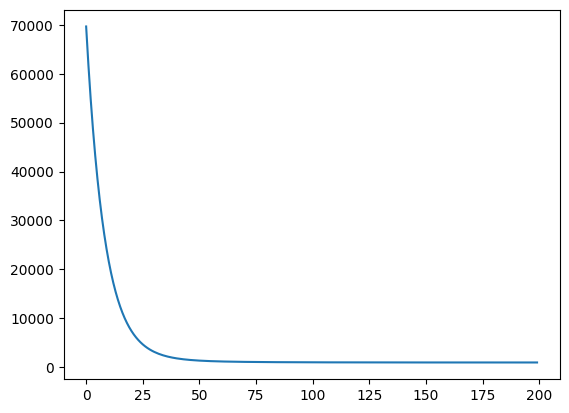

In [7]:
plt.plot(coefficients[3])
plt.show

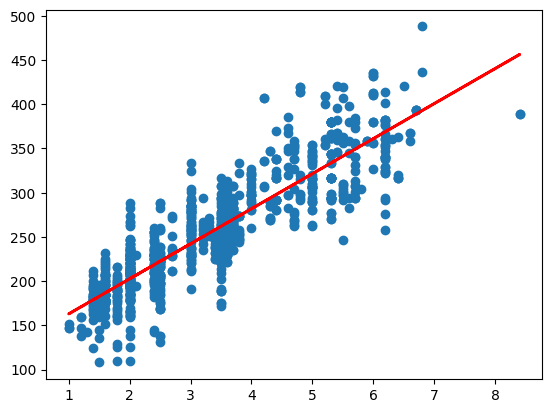

In [8]:
plt.scatter(X,Y)
plt.plot(X, y_pred, color='red', linewidth=2)

#### Домашнее задание №2
Задача для прогнозирования стоимости квартиры. Датасет содержит следующую информацию: количество комнат, общая площадь, жилая площадь, этаж, площадь кухни, расстояние от аэропорта, расстояние до центра города
1. Обучите модель на основе этих данных. Используйте метод градиентный спуск.
2. Посчитайте среднюю квадратичную ошибку и визуализируйте
3. Напишите выводы и интерпретируйте, как вы подбирали гиперпараметры

In [9]:
import pandas as pd

data = np.loadtxt("data2.csv",delimiter=",", skiprows=1).T.tolist()
rooms=np.array(data[0])
total_area=np.array(data[1])
living_area=np.array(data[2])
floor=np.array(data[3])
kitchen_area=np.array(data[4])
airports_nearest=np.array(data[5])
cityCenters_nearest=np.array(data[6])
price=np.array(data[7])

def gradientDescent(X,Y, learning_rate = 0.001, show_calculations = False):
    theta1 = np.ones((X.shape[1],len(X)))
    theta0 = np.ones(len(X))*100000
    iterations = 100
    n = len(X)

    for i in range(iterations):
        first = X.dot(theta1)
        y_predicted = []
        for j in range(len(first)):
            y_predicted.append(first[j,0])

        y_predicted += theta0

        tmp = []
        for _ in range(len(X)):
            tmp.append(0)

        Tmp = []
        for _ in range(X.shape[1]-1):
            Tmp.append(tmp)

        Tmp.append(Y-y_predicted)

        cost = (1/n) * sum([val**2 for val in (Y-y_predicted)])
        theta1_d = -(2/n)*sum(X*Tmp)
        theta0_d = -(2/n)*sum(Y-y_predicted)
        theta1 = theta1 - learning_rate * theta1_d
        theta0 = theta0 - learning_rate * theta0_d

        if cost > 10**10:
            break

        if show_calculations:
            print ("theta1 {}, theta0 {}, J {} iteration {}".format(theta1,theta0,cost, i))

    return y_predicted

In [10]:
X = np.matrix([total_area]).T
Y = price/total_area

y_pred = gradientDescent(X, Y)
sum((Y-y_pred)**2)/len(Y)

31811505427.27355

In [11]:
lrs = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

for lr in lrs:
    y_pred = gradientDescent(X,Y,learning_rate=lr)
    if lr == 10000:
        min_value = sum((Y - y_pred)**2)/len(Y)

    if sum((Y - y_pred)**2)/len(Y) < min_value:
        min_value = sum((Y - y_pred)**2)/len(Y)
        best_lr = lr
        best_y_pred = y_pred

print(best_lr, best_y_pred, min_value)

min_value**0.5 / Y.mean()

0.0001 [120370.05080267 107593.85669604 110542.20918219 ... 113736.25770885
 111751.78968933 125248.06219161] 2116363748.8232586


0.41928496899549195

1. Получилась достаточно большая среднеквадратичная ошибка, почти на 42% отличается от средней велечины;
2. Я пробовала изменить количество итераций и уровень learning_rate; увеличение числа итераций с 100 до 1000 увеличило время сходимости, но не изменило результат. Изменение Learning_rate напротив, дало оптимальное значение из возможных

#### Домашнее задание №3
Для решения используйте метод локальной регрессии.
1. Обучите модель на Х_train и Y_train
2. Спрогнозируйте на Х_test
3. Визуализируйте данные и результат
4. Напишите выводы

In [149]:
def kernel_function(xi,x,tau):
    return np.exp((- (xi - x) ** 2 )/ (2 * tau ** 2))

def locally_regression(X,Y,x,tau,epochs,alpha):
    theta = np.random.rand(X.shape[1])
    m = Y.size
    for i in range(epochs):
        prediction = np.dot(X,theta)
        error = prediction - Y
        weights = kernel_function(X[:,1],x,tau)
        theta = theta - (alpha/m) * np.dot(X.T,weights * error)
    return theta



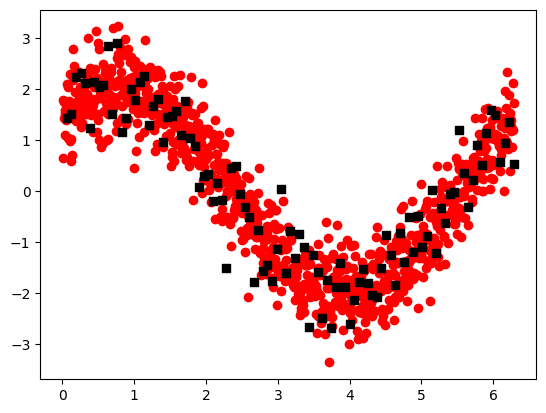

In [150]:
data = np.loadtxt("data4.csv",delimiter=",", skiprows=1).T.tolist()
test = np.loadtxt("test4.csv",delimiter=",", skiprows=1).T.tolist()
X_train=np.array(data[0])
Y_train=np.array(data[1])
X_test=np.array(test[0])
Y_test=np.array(test[1])
plt.scatter(X_train,Y_train,color="red")
plt.scatter(X_test,Y_test,color="black",marker='s')
plt.show()

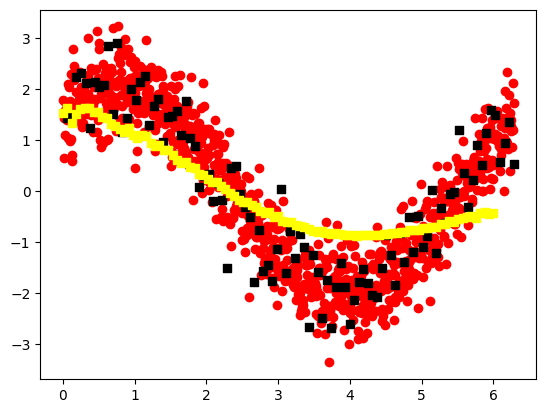

In [151]:
tau = 1.5
alpha = 0.001
x_test = 2

domain = np.linspace(0,6,num = len(X_test))
prediction = []
for i in range(len(domain)):
    theta = locally_regression(np.c_[np.ones(len(X_train)),X_train], Y_train, domain[i], tau, 10000, alpha)
    prediction.append(theta[0] + theta[1] * domain[i])


plt.scatter(X_train,Y_train,color="red")
plt.scatter(X_test,Y_test,color="black",marker='s')
plt.scatter(domain,prediction,color="yellow",marker='s')

plt.show()

Выводы:
Метод локальной регрессии позволяет придать важность близким данным, за счет чего обученная кривая имеет такой изогнутый вид. В целом, модель смогла освоить генеральную зависимость, однако точность ее далека от "достаточной". Предполагаю, улучшить ее возможно за счет нормализации данных и/или подбора гиперпараметров tau и alpha


#### Домашнее задание №4
Следующий датасет содержит нелинейные данные. Нам необходимо найти оптимальную модель, чтобы прогнозировать с минимальными ошибками.
1. Используйте обычный градиентный спуск и визуализируйте результат.
2. Используйте полиномиальную регрессию и найдите необходимую степень полинома и визуализируйте результат.
3. Напишите выводы.

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('data5.csv', header = None)
data.columns = ['x','y_noisy','y_true']

data.head()

,x,y_noisy,y_true
0,-2.000000,-8.634209,-8.422567
1,-1.918367,-6.061758,-7.505688
2,-1.836735,-4.341304,-6.661578
3,-1.755102,-6.896781,-5.887402
4,-1.673469,-6.248538,-5.180324


-1.5652729119773472 [1.89821374]


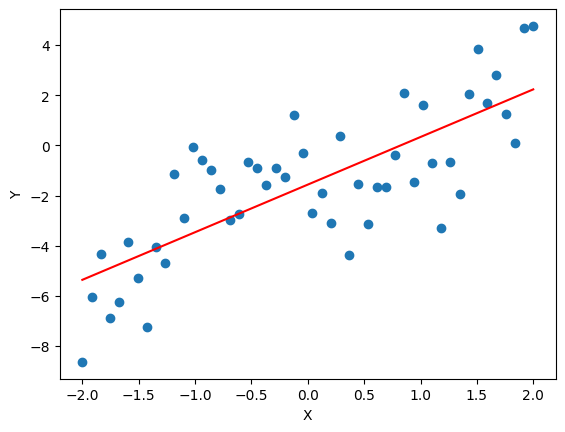

In [177]:
model = LinearRegression()

model = model.fit(data['x'].values.reshape(-1,1), data['y_noisy'])
print(model.intercept_, model.coef_)
data['y_pred'] = model.predict(data['x'].values.reshape(-1,1))

plt.scatter(data['x'].values.reshape(-1,1), data['y_noisy'])
plt.plot(data['x'], data['y_pred'], color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [178]:
print('Среднеквадратичная ошибка для линейной регрессии: ', sum((data['y_true'] - data['y_pred'])**2/len(data)))

Среднеквадратичная ошибка для линейной регрессии:  1.7164761612816073


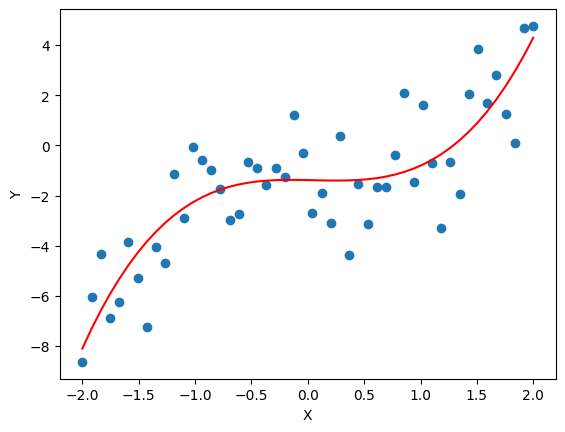

In [179]:
poly = PolynomialFeatures(3)

x_new = poly.fit_transform(data['x'].values.reshape(-1,1))
coefficients = np.linalg.inv(x_new.T @ x_new) @ x_new.T @ data['y_noisy'].values
data['y_pred'] = x_new @ coefficients

plt.scatter(data['x'].values.reshape(-1,1), data['y_noisy'])
plt.plot(data['x'], data['y_pred'], color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [180]:
print('Среднеквадратичная ошибка для полиномиальной регрессии: ', sum((data['y_true'] - data['y_pred'])**2/len(data)))

Среднеквадратичная ошибка для полиномиальной регрессии:  0.3275836625884479


Вывод: Метод полиномиальной регрессии имеет большую предсказательную силу относительно метода линейной регрессии: 0.33 против 1.72 по MSE

#### Домашнее задание №5
Следующий датасет содержит нелинейные данные. Нам необходимо найти оптимальную модель, чтобы прогнозировать с минимальными ошибками.
1. Используйте обычный градиентный спуск и визуализируйте результат.
2. Используйте полиномиальную регрессию и найдите необходимую степень полинома и визуализируйте результат.
3. Напишите выводы.

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('data6.csv', header = None)
data.columns = ['x','y_noisy','y_true']

data.head()

,x,y_noisy,y_true
0,-2.000000,3.852988,4.687086
1,-1.918367,2.512209,3.577024
2,-1.836735,3.395839,2.653286
3,-1.755102,3.438465,1.892239
4,-1.673469,1.429752,1.272463


-1.8663239373063067 [-3.01126244]


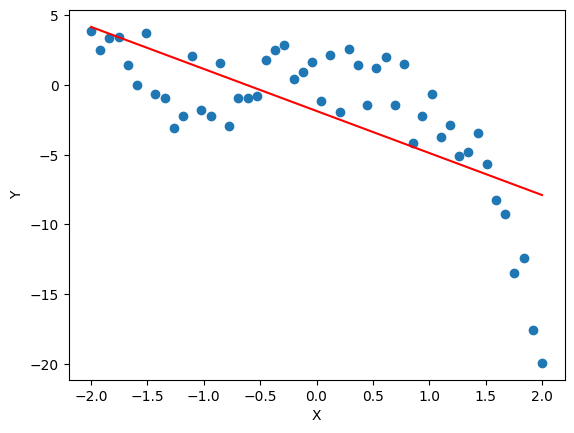

In [182]:
model = LinearRegression()

model = model.fit(data['x'].values.reshape(-1,1), data['y_noisy'])
print(model.intercept_, model.coef_)
data['y_pred'] = model.predict(data['x'].values.reshape(-1,1))

plt.scatter(data['x'].values.reshape(-1,1), data['y_noisy'])
plt.plot(data['x'], data['y_pred'], color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [183]:
print('Среднеквадратичная ошибка для линейной регрессии: ', sum((data['y_true'] - data['y_pred'])**2/len(data)))

Среднеквадратичная ошибка для линейной регрессии:  12.093227356196966


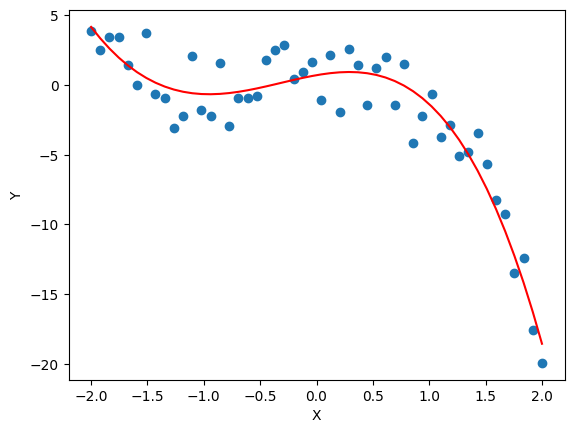

In [184]:
poly = PolynomialFeatures(4)

x_new = poly.fit_transform(data['x'].values.reshape(-1,1))
coefficients = np.linalg.inv(x_new.T @ x_new) @ x_new.T @ data['y_noisy'].values
data['y_pred'] = x_new @ coefficients

plt.scatter(data['x'].values.reshape(-1,1), data['y_noisy'])
plt.plot(data['x'], data['y_pred'], color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [185]:
print('Среднеквадратичная ошибка для полиномиальной регрессии: ', sum((data['y_true'] - data['y_pred'])**2/len(data)))

Среднеквадратичная ошибка для полиномиальной регрессии:  0.41123540716296686


Вывод: Вывод: Метод полиномиальной регрессии имеет большую предсказательную силу относительно метода линейной регрессии: 0.41 против 12.10 по MSE

## Домашнее задание №6
Задача прогнозирования стоимости квартиры. Используйте библиотеку sklearn
1. Проанализируйте данные и при необходимости приведите данные к единому масштабу
2. Разбейте данные на обучающую и тестируемую часть
3. Обучите модель
4. Посчитайте среднюю квадратичную ошибку
5. Напишите выводы


In [162]:
data = np.loadtxt("data2.csv",delimiter=",", skiprows=1).T.tolist()

In [163]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

df = pd.read_csv('data2.csv')

# make two datasets test and train for machine learning
X = df[['rooms', 'total_area','living_area', 'floor','kitchen_area','airports_nearest','cityCenters_nearest']]
y = df['last_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.0001, max_depth=5, criterion='squared_error')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Посчитай среднюю квадратичную ошибку для тестовой выборки.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Базовая среднеквадратичная ошибка: ', mse)

Базовая среднеквадратичная ошибка:  55388045266308.13


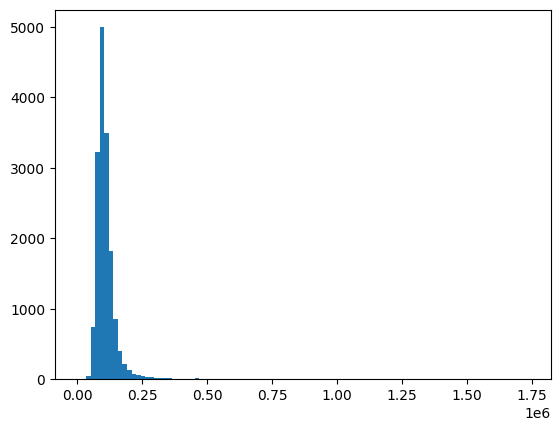

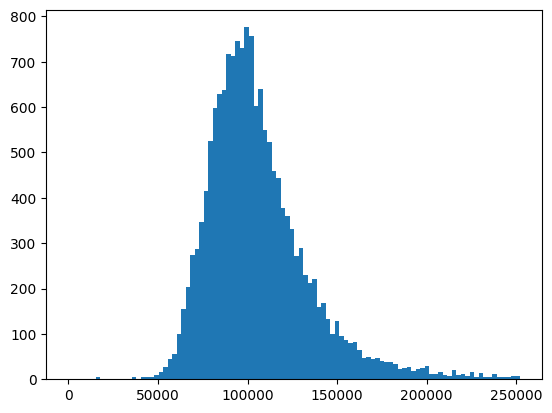

In [164]:
import matplotlib.pyplot as plt
df['m_price'] = df['last_price'] / df['total_area']

plt.hist(df['m_price'], bins=100)
plt.show()

std = df['m_price'].std()
avg = df['m_price'].mean()
_std = avg - 3 * std
std_ = avg + 3 * std

df1 = df[(df['m_price'] > _std) & (df['m_price'] < std_)]

plt.hist(df1['m_price'], bins=100)
plt.show()

In [165]:
# make two datasets test and train for machine learning
X = df1[['rooms', 'total_area','living_area', 'floor','kitchen_area','airports_nearest','cityCenters_nearest']]
y = df1['m_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.1, max_depth=3, criterion='squared_error')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

X_test2 = X_test.copy()
X_test2['m_price'] = y_pred
X_test2['last_price_predicted'] = X_test2['m_price'] * X_test2['total_area']
X_test2['last_price_true'] = y_test

#Посчитай среднюю квадратичную ошибку для тестовой выборки.
from sklearn.metrics import mean_squared_error
mse_area = mean_squared_error(X_test2['last_price_true'].values, X_test2['last_price_predicted'].values)
mse_m2 = mean_squared_error(y_test, y_pred)
print('Среднеквадратичная ошибка: ', mse_area, mse_m2)

Среднеквадратичная ошибка:  64505093163875.34 386015019.9012663


In [166]:
mse_m2**0.5/avg

0.17906728065021385

1. Исходные данные имели большой разброс. Для обучения, я взяла выборку по методу ±3 стандартных отклонения; так же, для однородности, я перевела прогноз из общей суммы в сумму за м2 (которая потом легко обратно конвертируется в общую сумму за квартиру)
2. Значение среднеквадратичной ошибки получилось достаточно большим и составляет примерно 18% от среднего значения;
3. Я попробовала оптимизировать такие гиперпараметры как n_estimators, learning_rate, max_depth путем обычного перебора. С уменьшением learning_rate и n_estimators ошибка увеличивалась; Оптимальным значением max_depth = 3

n_estimators - количество стадий градиентного бустинга - увеличивала с 100 (базовый показатель) до 10000 learning_rate - параметр обучения - уменьшала с 0.1 (базовый показатель) до 10е-4 max_depth - максимальная глубина индивидуальных регрессоров - увеличивала с 1 (базовый показатель) до 5